In [1]:
#Importing the required libraries

import os
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nsetools import Nse
from nsepy import get_history

import seaborn as sns

from datetime import datetime, timedelta, date

In [2]:
#Configuring the working directory
os.getcwd()

'C:\\Users\\Bharath Ambati\\Desktop\\INSOFE\\Internship'

#### 1. Loading Data
The list of stocks of different indices have be taken from 'nseindia.com'  
The data for 'P/E Ratio' is taken from 'valueresearchonline.com'

In [3]:
#Loading from excels
Bluechip = pd.read_excel('Data\\NIFTY50_PE_Ratio_19_Sept_2019.xlsx')
Midcap= pd.read_excel('Data\\Midcap100_PE_Ratio_19_Sept_2019.xlsx')
Smallcap = pd.read_excel('Data\\SmallCap100_PE_Ratio_19_Sept_2019.xlsx')

In [4]:
#Creating a new column identifying the stock type 
Bluechip['Category'] = "Bluechip"
Midcap['Category'] = 'Midcap'
Smallcap['Category'] = 'Smallcap'

In [5]:
import pandas_profiling as profile

In [6]:
Bluechip.profile_report()

### Stock Selection Strategy

###### 2. Selecting stocks with PE values ranging between 4-15 from different sectors. 

In [7]:
#Selecting stocks based on their index numbers
Bluechip_stocks = Bluechip[['Company', 'Symbol', 'Price', 'PE', 'Category']].iloc[[41, 24, 33, 18]]
Midcap_stocks = Midcap[['Company', 'Symbol', 'Price', 'PE', 'Category']].iloc[[42, 57, 25, 30]]
Smallcap_stocks = Smallcap[['Company', 'Symbol', 'Price', 'PE', 'Category']].iloc[[29, 7, 96, 19]]

In [8]:
#Merging all the 3 dataframes into 1
portfolio_stocks_list = pd.merge(Bluechip_stocks, Midcap_stocks, how = 'outer')
portfolio_stocks_list = pd.merge(portfolio_stocks_list, Smallcap_stocks, how = 'outer')
print(portfolio_stocks_list.shape)

(12, 5)


In [9]:
#Final list of stock for portfoliob
portfolio_stocks_list

,Company,Symbol,Price,PE,Category
0,Tata Steel Ltd.,TATASTEEL,352.05,4.80,Bluechip
1,Indian Oil Corpn. Ltd.,IBULHSGFIN,126.95,8.63,Bluechip
2,National Thermal Power Corp. Ltd.,NTPC,121.00,10.29,Bluechip
3,Hero Motocorp Ltd.,HEROMOTOCO,2578.45,13.78,Bluechip
4,Hexaware Technologies Ltd.,HEXAWARE,383.95,19.36,Midcap
5,LIC Housing Finance Ltd.,LICHSGFIN,386.00,7.95,Midcap
6,Edelweiss Financial Services Ltd.,EDELWEISS,105.15,11.49,Midcap
7,Federal Bank Ltd.,FEDERALBNK,83.90,12.31,Midcap
8,Future Lifestyle Fashion Ltd.,FLFL,2.76,4.87,Smallcap
9,Bombay Dyeing & Mfg. Co. Ltd.,BAJAJELEC,-3.37,8.30,Smallcap


1. The final list of stocks have been selected manually 4 from each cap category
2. One from each sector
3. All stocks have low P/E value ranging from 1.8 to 20 to see how the weight allocation change among them

#### 3. Downloading data for the Selected stocks in 'portfolio_stocks_list'
1. The data is downloaded using the 'NSE' python library. 

In [10]:
#nse = Nse()
#Data Download
start = date(2016,6,6)
end = date(2019,7,2)

portfolio_data = []
for i in portfolio_stocks_list.Symbol.values:
    portfolio_data.append(get_history(i, start = start, end = end))
    portfolio_stocks_data = pd.concat(portfolio_data)
    

In [11]:
print(portfolio_stocks_data.shape)
portfolio_stocks_data.head()

(9132, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2016-06-06,TATASTEEL,EQ,338.55,335.00,340.70,332.15,338.60,337.85,336.99,4969784,1.674766e+14,59409,1114540,0.2243
2016-06-07,TATASTEEL,EQ,337.85,339.55,343.85,337.05,343.55,342.60,341.09,3898620,1.329786e+14,42571,608785,0.1562
2016-06-08,TATASTEEL,EQ,342.60,343.25,346.45,338.50,341.50,341.50,342.17,4466650,1.528362e+14,43354,769901,0.1724
2016-06-09,TATASTEEL,EQ,341.50,340.00,346.70,340.00,344.00,342.05,343.59,5935910,2.039511e+14,60789,1950837,0.3287
2016-06-10,TATASTEEL,EQ,342.05,342.00,344.50,333.50,333.70,334.40,338.99,5506426,1.866617e+14,48464,1461802,0.2655


In [12]:
#Verifying whether all the selected stocks have data for the specified period
portfolio_stocks_data['Symbol'].value_counts()

NTPC          761
TATASTEEL     761
BAJAJELEC     761
EDELWEISS     761
IBULHSGFIN    761
HEROMOTOCO    761
CYIENT        761
LICHSGFIN     761
HEXAWARE      761
VENKEYS       761
FLFL          761
FEDERALBNK    761
Name: Symbol, dtype: int64

In [13]:
#Subsetting the required fields
portfolio_stocks_df = portfolio_stocks_data[['Symbol', 'Prev Close']]

In [14]:
#Renaming column to avoid spaces in the column header
portfolio_stocks_df.rename({'Prev Close' : 'Prev_close'},axis=1,  inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [15]:
#Using pivot to create stocks as columns

portfolio_stocks_df = portfolio_stocks_df.pivot(columns= 'Symbol', index= portfolio_stocks_data.index)

#Setting the columns

portfolio_stocks_df.columns = [col[1] for col in portfolio_stocks_df.columns]

#Filling 'NaN' if any

portfolio_stocks_df.fillna(0, inplace = True)

In [16]:
portfolio_stocks_df.head()

,BAJAJELEC,CYIENT,EDELWEISS,FEDERALBNK,FLFL,HEROMOTOCO,HEXAWARE,IBULHSGFIN,LICHSGFIN,NTPC,TATASTEEL,VENKEYS
Date,,,,,,,,,,,,
2016-06-06,222.05,478.95,72.40,51.00,107.50,3146.20,213.90,751.35,476.00,147.60,338.55,383.50
2016-06-07,220.10,473.15,70.45,53.60,112.20,3113.25,215.00,744.75,467.15,147.10,337.85,381.75
2016-06-08,218.65,486.85,76.80,56.65,113.55,3129.70,214.35,737.85,474.45,148.45,342.60,383.75
2016-06-09,225.60,495.50,79.00,57.95,113.60,3170.10,215.35,740.60,480.20,148.15,341.50,388.10
2016-06-10,228.95,500.00,77.60,58.35,112.15,3086.70,214.50,736.85,475.60,151.05,342.05,387.95


Now that we have clean data for 12 stocks from 3 different categories let's see the price movement for each stock

## 3. Data Exploration

###### 3.1 Plotting the prices of the stocks

In [17]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0, 0.5, 'Price in INR')

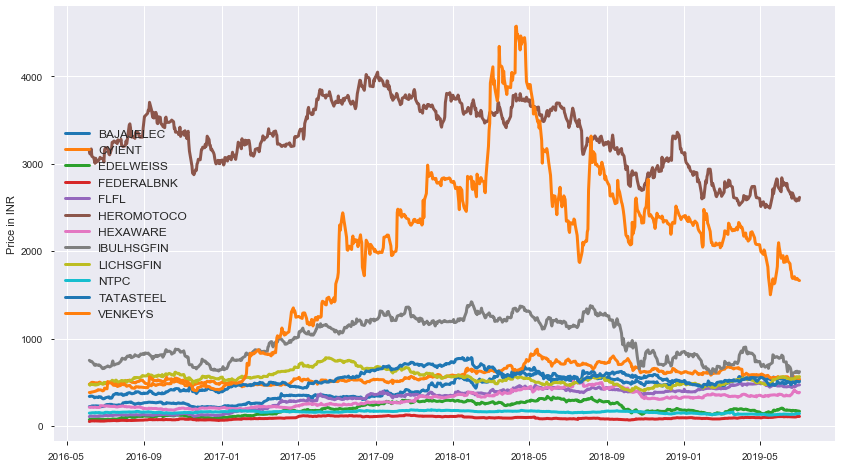

In [18]:
plt.figure(figsize= (14, 8))

for c in portfolio_stocks_df.columns:
           plt.plot(portfolio_stocks_df.index, portfolio_stocks_df[c],  label = c, lw = 3)
plt.legend(loc = 'best', fontsize = 12)
plt.ylabel('Price in INR')


##### 3.2. To understand better about the volatility of the stocks we will be plotting them using the daily returns / percentage change

In [19]:
#Calculating the percentage change for each stock
returns = portfolio_stocks_df.pct_change().dropna()


In [20]:
returns.head()

,BAJAJELEC,CYIENT,EDELWEISS,FEDERALBNK,FLFL,HEROMOTOCO,HEXAWARE,IBULHSGFIN,LICHSGFIN,NTPC,TATASTEEL,VENKEYS
Date,,,,,,,,,,,,
2016-06-07,-0.008782,-0.012110,-0.026934,0.050980,0.043721,-0.010473,0.005143,-0.008784,-0.018592,-0.003388,-0.002068,-0.004563
2016-06-08,-0.006588,0.028955,0.090135,0.056903,0.012032,0.005284,-0.003023,-0.009265,0.015627,0.009177,0.014059,0.005239
2016-06-09,0.031786,0.017767,0.028646,0.022948,0.000440,0.012909,0.004665,0.003727,0.012119,-0.002021,-0.003211,0.011336
2016-06-10,0.014849,0.009082,-0.017722,0.006903,-0.012764,-0.026308,-0.003947,-0.005063,-0.009579,0.019575,0.001611,-0.000386
2016-06-13,0.004805,-0.004200,0.012887,0.001714,-0.003567,-0.005572,-0.010956,-0.034132,-0.004836,0.002979,-0.022365,0.012888


In [21]:
#Creating returns for each category to analyse the volatility easily
returns_bluechip = returns[['TATASTEEL', 'IBULHSGFIN', 'NTPC', 'HEROMOTOCO' ]]
returns_midcap = returns[['HEXAWARE', 'LICHSGFIN', 'EDELWEISS', 'FEDERALBNK' ]]
returns_smallcap = returns[['FLFL', 'BAJAJELEC', 'VENKEYS', 'CYIENT' ]]


Text(0.5, 1.0, 'Smallcap Stocks Returns Anaysis')

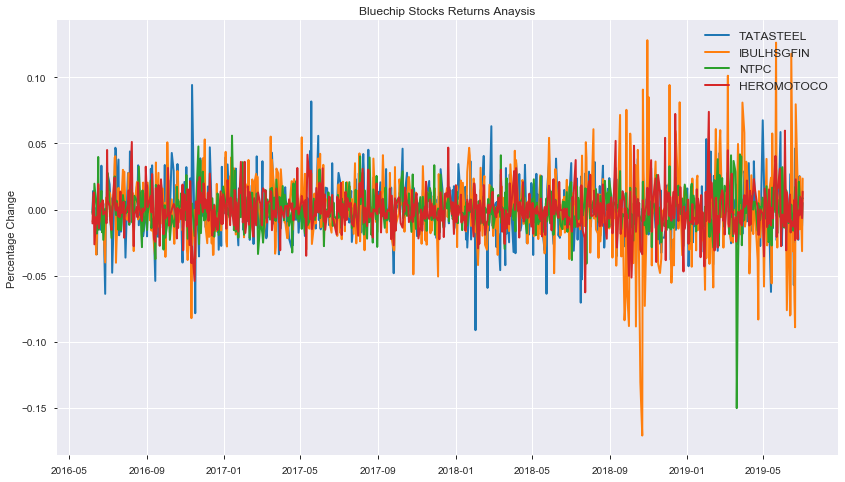

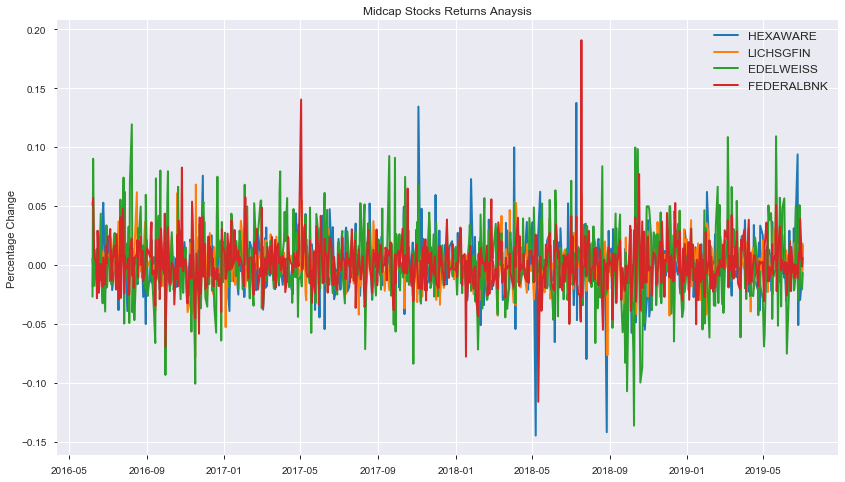

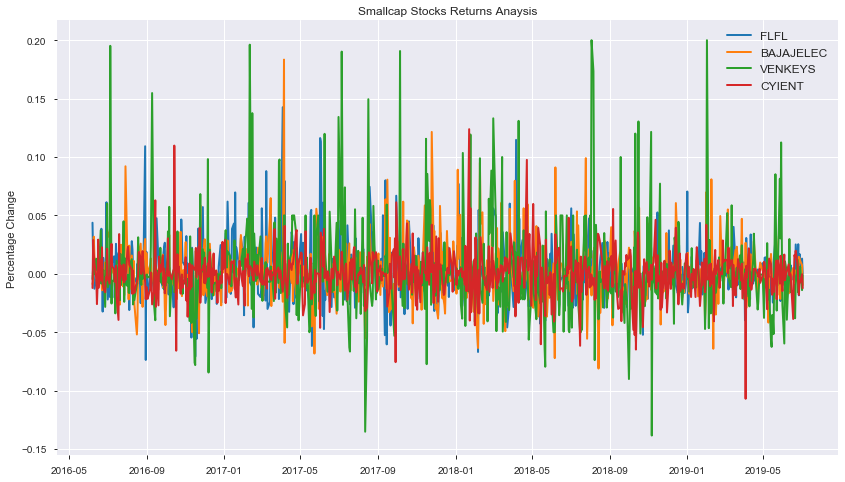

In [22]:
#1. Plotting Bluechip Companies returns
plt.figure(figsize = (14, 8))
for c in returns_bluechip.columns.values:
    plt.plot(returns_bluechip.index, returns_bluechip[c], lw = 2, label = c)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Percentage Change')
plt.title('Bluechip Stocks Returns Anaysis')


#2. Plotting Midcap Companies returns
plt.figure(figsize = (14, 8))
for c in returns_midcap.columns.values:
    plt.plot(returns_midcap.index, returns_midcap[c], lw = 2, label = c)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Percentage Change')
plt.title('Midcap Stocks Returns Anaysis')

#3. Plotting Smallcap Companies returns
plt.figure(figsize = (14, 8))
for c in returns_smallcap.columns.values:
    plt.plot(returns_smallcap.index, returns_smallcap[c], lw = 2, label = c)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Percentage Change')
plt.title('Smallcap Stocks Returns Anaysis')


## 4. Model Building

### 4.1. Monte Carlo Simulation

1. My basic approach to building a Portfolio Optimization is based on the Modern Portfolio Theory by Harry Markowitz 
which states that if an investor is willing to take higher risk then it needs to be compensated with high return. If a 
portfolio gives same return for a given risk then the investor will choose the one with low risk. 
2. Porfolio performance is calculated using Sharpe Ratio.
    (Expected Returns - Risk free rate) / Portfolio standard deviation
3. Efficient Frontier

###### 4.1.1. Calculating 
1. Annual returns
2. Annual volatility / risk\
3. Creating a covariance matrix to calculate portfolio volatility / risk


In [23]:
portfolio_stocks_df.head()

,BAJAJELEC,CYIENT,EDELWEISS,FEDERALBNK,FLFL,HEROMOTOCO,HEXAWARE,IBULHSGFIN,LICHSGFIN,NTPC,TATASTEEL,VENKEYS
Date,,,,,,,,,,,,
2016-06-06,222.05,478.95,72.40,51.00,107.50,3146.20,213.90,751.35,476.00,147.60,338.55,383.50
2016-06-07,220.10,473.15,70.45,53.60,112.20,3113.25,215.00,744.75,467.15,147.10,337.85,381.75
2016-06-08,218.65,486.85,76.80,56.65,113.55,3129.70,214.35,737.85,474.45,148.45,342.60,383.75
2016-06-09,225.60,495.50,79.00,57.95,113.60,3170.10,215.35,740.60,480.20,148.15,341.50,388.10
2016-06-10,228.95,500.00,77.60,58.35,112.15,3086.70,214.50,736.85,475.60,151.05,342.05,387.95


In [24]:
#Returns is calculated by percentage change of each stock
returns = portfolio_stocks_df.pct_change().dropna()
mean_returns = returns.mean()

In [25]:
mean_returns

BAJAJELEC     0.001418
CYIENT        0.000323
EDELWEISS     0.001608
FEDERALBNK    0.001229
FLFL          0.002219
HEROMOTOCO   -0.000128
HEXAWARE      0.001023
IBULHSGFIN    0.000121
LICHSGFIN     0.000385
NTPC          0.000059
TATASTEEL     0.000736
VENKEYS       0.002620
dtype: float64

In [26]:
#Creating the covariance matrix of returns
cov_matrix = returns.cov() 

###### 4.1.2  Portfolio Perfomance
To assess a portfolio's performance I'll be using the basic Sharpe Ratio.  
Sharpe Ratio can be calculated using the formula:  
(Expected return - Risk free rate) / Portfolio standard deviation  

###### The 'annual_portfolio_performance' function is calculating the return and risk for a given weights, mean_returns and covariance matrix.

In [27]:
def annual_portfolio_performance(weights, mean_returns, cov_matrix):
    annual_returns = np.sum(mean_returns * weights) * 250
    annual_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(250)
    
    return annual_returns, annual_risk

###### The function 'random_portfolios' 'is  
1. Generating a random set of weights for given number of portfolios and assets
2. Calculating the portfolio standard deviation (risk),  return and Sharpe ratio for a given set of weights

In [28]:
def random_portfolios(num_assets, num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    #creating a 3d array with length specied in 'num_portfolios'
    results = np.zeros((3,num_portfolios))
    #Generate random weights and create a list of all the random generated weights
    weights_record = []
    #For 'n' number of portfolios we are generating random weights
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        #'weights_record' is the list of weights for a given number of portfolios and assets
        weights_record.append(weights)
        #Using the above created 'annual_portfolio_perfomance' function we generate portfolio standard deviation and returns
        portfolio_return, portfolio_std_dev = annual_portfolio_performance(weights, mean_returns, cov_matrix)
        # So for every set of weights we are calculating the risk, return and sharpe ration and saving it in results. 
        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [29]:
#Defining the required values for the function 'random_portfolios' input
num_assets = portfolio_stocks_df.shape[1]
num_portfolios = 25000
# The risk free rate is taken from the govt bond annual return rate. 
risk_free_rate = 0.069

Using the function 'random_portfolios'  now we have 1000 randomly generated weights for 4 assets and their respective returns, portolio standard deviation (risk) and Sharpe ratio. 


##### 1.3 Visualising the results of Maximum Sharpe Ratio and min volatility / risk
1. Getting weight, portfolio returns, risk and Sharpe Ratio using the above 'random_portfolio' function
2. Creating a dataframe of weights whose Sharpe ratio is highest
3. Creating a dataframe of weights with low volatility / risk
4. Printing all the results of Sharpe ratio and miminum risk returns
5. Visualizing the returns, risk and sharpe ratio

In [30]:
def efficient_frontier_random_portfolios(num_assets, num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    #Step 1
    final_results, final_weights = random_portfolios(num_assets, num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    #Step 2
    #Taking the maximum values of 'results[2]' which is the sharpe ratio
    max_sharpe_indexId = np.argmax(final_results[2])
    #Getting the returns and risk for max sharpe ratio
    portfolio_return, portfolio_volatility = final_results[0, max_sharpe_indexId], final_results[1, max_sharpe_indexId]
    #Creating  a dataframe of the final weights of max sharpe ratio
    max_sharpe_allocation = pd.DataFrame(final_weights[max_sharpe_indexId], index = portfolio_stocks_df.columns, columns = ['Weights_Allocation'])
    #Rounding the values to 2 digits
    max_sharpe_allocation.Weights_Allocation = [round(i*100, 2) for i in max_sharpe_allocation.Weights_Allocation]
    #Transposing Stock names from index to columns
    max_sharpe_allocation = max_sharpe_allocation.T
    
    #Step 3
    min_vol_indexId = np.argmin(final_results[1])
    portfolio_min_return, portfolio_min_volatility = final_results[0, min_vol_indexId], final_results[1, min_vol_indexId]
    min_vol_allocation = pd.DataFrame(final_weights[min_vol_indexId], index = portfolio_stocks_df.columns, columns = ['Allocation'])
    min_vol_allocation.Allocation = [round(i*100, 2) for i in min_vol_allocation.Allocation]
    min_vol_allocation = min_vol_allocation.T
    
    #Step 4
    print("_" * 125)
    print("Maximum Sharpe Allocation \n")
    print("Annual Portfolio Return", round(portfolio_return, 4))
    print("Annual Risk / Volatility", round(portfolio_volatility, 4))
    print("Maximum Sharpe Ratio", final_results[2, max_sharpe_indexId])
    print("\n")
    print(max_sharpe_allocation)
    
    print("_" * 125)
    print("Minimum Volatility Annual Portfolio Return")
    print("Annual Return", round(portfolio_min_return, 2))
    print("Annual Risk / Volatility", round(portfolio_min_volatility, 2))
    print("Sharpe Ratio", final_results[2, min_vol_indexId])

    print("\n")
    print(min_vol_allocation)
    
    #Step 5 - Visualization
    plt.figure(figsize=(20, 12))
    plt.scatter(final_results[1, :], final_results[0, :], c = final_results[2, :], cmap = 'YlGnBu', s = 10, alpha = 3)
    plt.colorbar()
    plt.scatter(portfolio_volatility, portfolio_return, marker = '*', color = 'r',  s = 500, label = 'Maximum Sharpe Ratio')
    plt.scatter(portfolio_min_volatility, portfolio_min_return, marker = '*', color = 'g', s = 500, label = 'Minimum Volatility')
    plt.title("Simulation of Portfolio Optimization based on Efficient Frontier")
    plt.xlabel("Annualised Volatility / Risk")
    plt.ylabel("Annualised Returns")
    plt.legend()
    

_____________________________________________________________________________________________________________________________
Maximum Sharpe Allocation 

Annual Portfolio Return 0.4045
Annual Risk / Volatility 0.2362
Maximum Sharpe Ratio 1.4202253431860605


                    BAJAJELEC  CYIENT  EDELWEISS  FEDERALBNK   FLFL  \
Weights_Allocation      15.41    2.48       7.27       18.81  18.33   

                    HEROMOTOCO  HEXAWARE  IBULHSGFIN  LICHSGFIN  NTPC  \
Weights_Allocation        1.25      5.96        2.22       3.92  3.01   

                    TATASTEEL  VENKEYS  
Weights_Allocation       0.06    21.27  
_____________________________________________________________________________________________________________________________
Minimum Volatility Annual Portfolio Return
Annual Return 0.18
Annual Risk / Volatility 0.15
Sharpe Ratio 0.7501121091205838


            BAJAJELEC  CYIENT  EDELWEISS  FEDERALBNK   FLFL  HEROMOTOCO  \
Allocation       6.65   19.85        3.6  

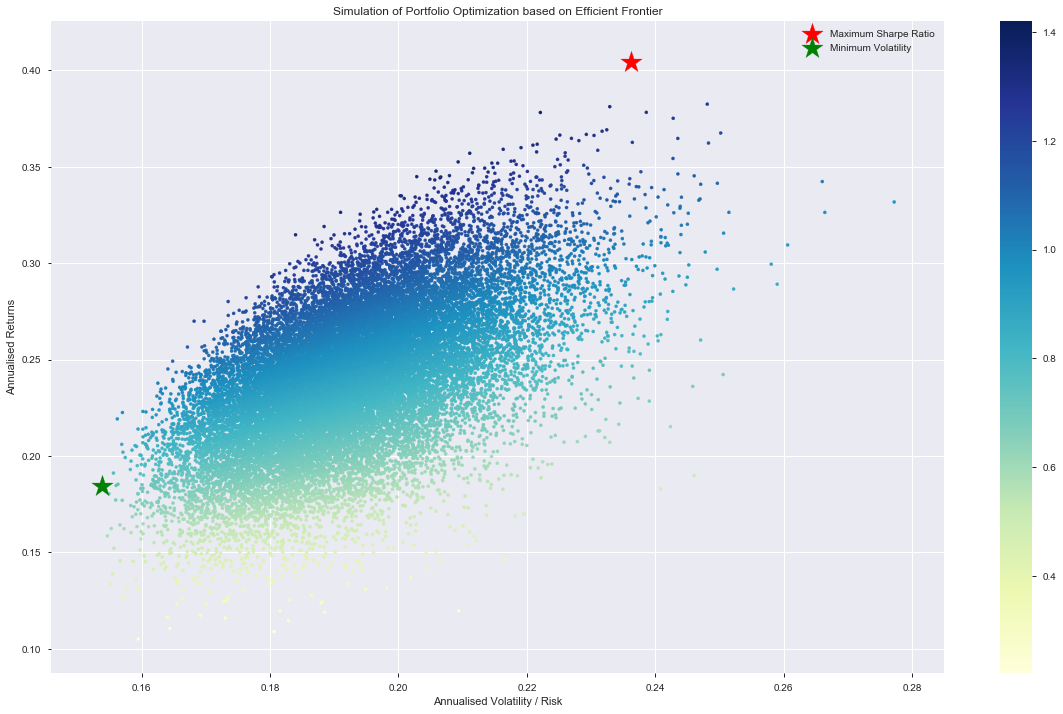

In [31]:
efficient_frontier_random_portfolios(num_assets, num_portfolios, mean_returns, cov_matrix, risk_free_rate)

1. It appears that for both strategies the risk seems to be very high and close. 16 in low risk vs 20 in high risk. 
2. As expected since Maruti is very stable high weight allocation was given to it especially for a high risk investment startegy. The second highest weight allocation as given to TCS as it is the next most stable stock except for that one negative spike. 
4. Although, ITC and ONGC had high negative spikes they were given very low weights. It could be maybe because of the low trading price when compared to the other two. 
3. Even though for a low risk strategy the allocation from Maruti was reduced considerable it appears that the risk hasn't reduced much. 


### 4.2. Using 'PYOPT' library for Linear Optimization

In [32]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [33]:
# Calculate expected returns and sample covariance

mu = expected_returns.mean_historical_return(portfolio_stocks_df) #Mean Returns
S = risk_models.sample_cov(portfolio_stocks_df) # Annualised covariance matrix 


##### 4.2.1  Strategy 1  - Max Sharpe Ratio

In [48]:

# Calculate expected returns and sample covariance

mu = expected_returns.mean_historical_return(portfolio_stocks_df) #Mean Returns
S = risk_models.sample_cov(portfolio_stocks_df) # Annualised covariance matrix 

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'BAJAJELEC': 0.1642, 'CYIENT': 0.0, 'EDELWEISS': 0.03833, 'FEDERALBNK': 0.11158, 'FLFL': 0.40099, 'HEROMOTOCO': 0.0, 'HEXAWARE': 0.13891, 'IBULHSGFIN': 0.0, 'LICHSGFIN': 0.0, 'NTPC': 0.0, 'TATASTEEL': 0.0, 'VENKEYS': 0.14598}
Expected annual return: 46.5%
Annual volatility: 23.9%
Sharpe Ratio: 1.86


(0.46512399624371403, 0.2393847942677122, 1.8594497516242265)

#### 4.2.2. Strategy 2  - Low Risk 

In [40]:
Low_risk = ef.efficient_risk(0.069, 0.069)

In [41]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
raw_weights = ef.efficient_risk(0.08, 0.069)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'BAJAJELEC': 0.06232, 'CYIENT': 0.17348, 'EDELWEISS': 0.0, 'FEDERALBNK': 0.0334, 'FLFL': 0.07175, 'HEROMOTOCO': 0.21858, 'HEXAWARE': 0.08108, 'IBULHSGFIN': 0.0, 'LICHSGFIN': 0.04696, 'NTPC': 0.25909, 'TATASTEEL': 0.05334, 'VENKEYS': 0.0}
Expected annual return: 11.9%
Annual volatility: 14.4%
Sharpe Ratio: 0.69


(0.1190061631296632, 0.14389539547400818, 0.6880426076423458)